In [9]:
import pandas as pd
from glob import glob
import numpy as np

### Plotting & other analysis throughout the block

In [11]:
import seaborn as sns
from matplotlib.pylab import plt

data = pd.read_csv('MuEtAl-2022-Exp1-Lab-EyetrackingData.csv')

# To rename first & last fixations for star and pentagon shapes separately
data['First Fixation Star'] = (data['First Fixation Set'] == 'star').astype(int)
data['Last Fixation Star'] = (data['Last Fixation Set'] == 'star').astype(int)

data['First Fixation Pentagon'] = (data['First Fixation Set'] == 'pentagon').astype(int)
data['Last Fixation Pentagon'] = (data['Last Fixation Set'] == 'pentagon').astype(int)

data['First Fixation Start Optimal'] = (((data['Starting Plateau']  == 0) & (data['First Fixation Star'] == 1))|((data['Starting Plateau']  == 1) & (data['First Fixation Star'] == 0))).astype(int) 
data['Last Fixation Start Optimal'] = (((data['Starting Plateau']  == 0) & (data['Last Fixation Star'] == 1))|((data['Starting Plateau']  == 1) & (data['Last Fixation Star'] == 0))).astype(int) 

In [16]:
# To add columns of first & last fixations on start optimal shapes

data['Start Optimal Count'] = data['Pentagon Count'] * data['Starting Plateau'] + data['Star Count'] * (1 - data['Starting Plateau'])

data['First Fixation Start Optimal Normalized'] =  data['First Fixation Start Optimal'] /  data['Start Optimal Count']
data['Last Fixation Start Optimal Normalized'] =  data['Last Fixation Start Optimal'] /  data['Start Optimal Count']

# # To add columns of total fixations on start optimal shapes

data['Fixation Count Start Optimal'] = data['Pentagon Fixation Count'] * data['Starting Plateau'] + data['Star Fixation Count'] * (1 - data['Starting Plateau'])
data['Fixation Count Start Optimal Normalized'] = data['Fixation Count Start Optimal'] / data['Start Optimal Count']

data_avg = data.groupby(['Participant No', 'CycleIndex', 'Starting Plateau']).mean().reset_index()
display(data_avg)




,Participant No,CycleIndex,Starting Plateau,Unnamed: 0,First Fixation Time,First Fixation X,First Fixation Y,First Fixation on Target,Fixation Count,Last Fixation on Target,...,Last Fixation Star,First Fixation Pentagon,Last Fixation Pentagon,First Fixation Start Optimal,Last Fixation Start Optimal,Start Optimal Count,First Fixation Start Optimal Normalized,Last Fixation Start Optimal Normalized,Fixation Count Start Optimal,Fixation Count Start Optimal Normalized
0,1.0,0.0,0,333.20,245.00,-218.80,-132.20,0.40,7.60,0.60,...,0.40,0.60,0.60,0.40,0.40,1.0,0.40,0.40,3.2,3.2
1,1.0,0.0,1,340.20,676.60,-68.40,-122.40,0.80,2.60,0.60,...,0.80,0.40,0.20,0.40,0.20,1.0,0.40,0.20,1.2,1.2
2,1.0,1.0,0,334.20,634.80,-206.60,-5.60,0.40,2.60,0.60,...,0.60,0.60,0.40,0.40,0.60,1.0,0.40,0.60,1.6,1.6
3,1.0,1.0,1,341.20,243.60,-167.60,-224.20,0.20,5.00,0.80,...,0.80,0.20,0.20,0.20,0.20,1.0,0.20,0.20,0.4,0.4
4,1.0,2.0,0,335.20,244.75,-247.50,-35.25,0.25,2.40,0.80,...,0.80,0.60,0.20,0.20,0.80,1.0,0.20,0.80,1.4,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,27.0,96.0,1,636.25,284.00,111.75,176.50,0.50,3.25,0.25,...,0.75,0.25,0.25,0.25,0.25,1.0,0.25,0.25,1.0,1.0
5144,27.0,97.0,0,389.75,230.25,-293.25,13.75,0.25,4.00,0.25,...,0.00,1.00,1.00,0.00,0.00,1.0,0.00,0.00,1.5,1.5
5145,27.0,97.0,1,637.25,272.75,-98.75,2.75,0.75,3.25,0.50,...,1.00,0.25,0.00,0.25,0.00,1.0,0.25,0.00,1.0,1.0
5146,27.0,98.0,0,390.75,273.50,-9.75,9.25,0.00,4.75,0.25,...,0.25,1.00,0.75,0.00,0.25,1.0,0.00,0.25,2.0,2.0


In [17]:
# set parameters for plotting
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

No handles with labels found to put in legend.


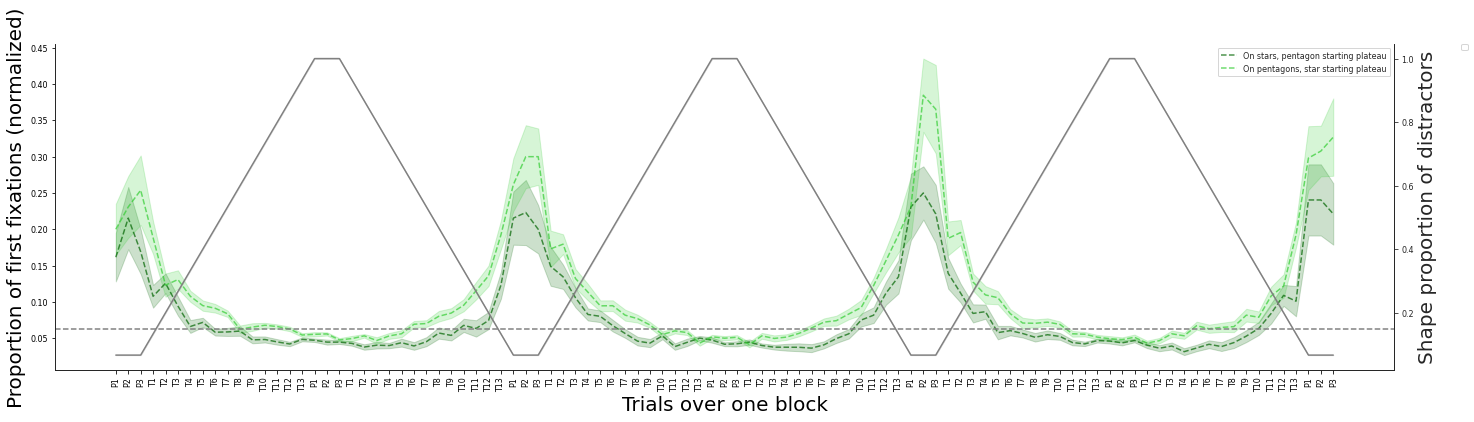

In [18]:
fig, ax = plt.subplots(1, figsize=(24,6))
sns.set_style("white")
ax.grid(False)

# First fixation on each shape throughout the block

sns.lineplot(data=data_avg[data_avg['Starting Plateau']==0], x='CycleIndex',y = 'First Fixation Start Optimal Normalized',
            color = 'darkgreen', ax=ax, linestyle='dashed', label='On stars, pentagon starting plateau',
             errorbar='se',alpha = 0.7, err_style='band')
sns.lineplot(data=data_avg[data_avg['Starting Plateau']==1], x='CycleIndex', y = 'First Fixation Start Optimal Normalized',
            color = 'limegreen', ax=ax, linestyle='dashed', label='On pentagons, star starting plateau',
             errorbar='se',alpha = 0.7, err_style='band')
ax1 = ax.twinx()
sns.lineplot(data=data_avg, x="CycleIndex", y="spu_elements_percentage", color='grey', ax=ax1, dashes=False)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_xlabel("Trials over one block",fontsize = 20)
ax.set_ylabel("Proportion of first fixations (normalized)",color = 'black',fontsize = 20)
plt.xticks(range(0,99))
ax.set_xticklabels(6 * (['P1','P2','P3'] + ["T%d" %i for i in range(1,14)])+['P1','P2','P3'],rotation = 90)

ax.spines["top"].set_visible(False)
ax1.set_ylabel("Shape proportion of distractors",fontsize = 20)
ax1.spines["top"].set_visible(False)

ax.axhline(1/16, linestyle = "dashed", color = "gray")

plt.rc('xtick', labelsize = 12)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 16)    # fontsize of the tick labels

plt.savefig('first_fixation.svg')
plt.show()


No handles with labels found to put in legend.


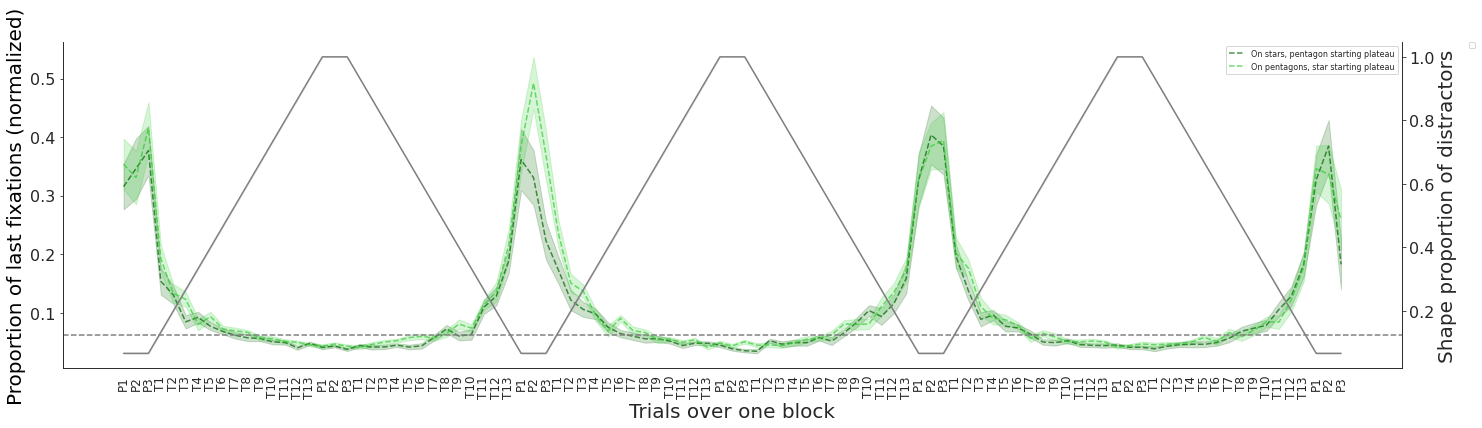

In [19]:
fig, ax = plt.subplots(1, figsize=(24,6))

sns.set_style("white")
ax.grid(False)

# last fixation on each shape throughout the block

sns.lineplot(data=data_avg[data_avg['Starting Plateau']==0], x='CycleIndex',y = 'Last Fixation Start Optimal Normalized',
            color = 'darkgreen', ax=ax, linestyle='dashed', label='On stars, pentagon starting plateau',
             errorbar='se',alpha = 0.7, err_style='band')
sns.lineplot(data=data_avg[data_avg['Starting Plateau']==1], x='CycleIndex', y = 'Last Fixation Start Optimal Normalized',
            color = 'limegreen', ax=ax, linestyle='dashed', label='On pentagons, star starting plateau',
             errorbar='se',alpha = 0.7, err_style='band')
ax1 = ax.twinx()
sns.lineplot(data=data_avg, x="CycleIndex", y="spu_elements_percentage", color='grey', ax=ax1, dashes=False)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_xlabel("Trials over one block",fontsize=20)

ax.set_ylabel("Proportion of last fixations (normalized)",color = 'black',fontsize=20)

ax1.set_ylabel("Shape proportion of distractors",fontsize=20)

plt.xticks(range(0,99))
ax.set_xticklabels(6 * (['P1','P2','P3'] + ["T%d" %i for i in range(1,14)])+['P1','P2','P3'],rotation = 90)

ax.spines["top"].set_visible(False)

ax1.spines["top"].set_visible(False)

ax.axhline(1/16, linestyle = "dashed", color = "gray")


#plt.rc('font', size = SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize = SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize = MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize = 12)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 16)    # fontsize of the tick labels
#plt.rc('legend', fontsize = SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize = BIGGER_SIZE)  # fontsize of the figure title

plt.savefig('last_fixation.svg')
plt.show()

No handles with labels found to put in legend.


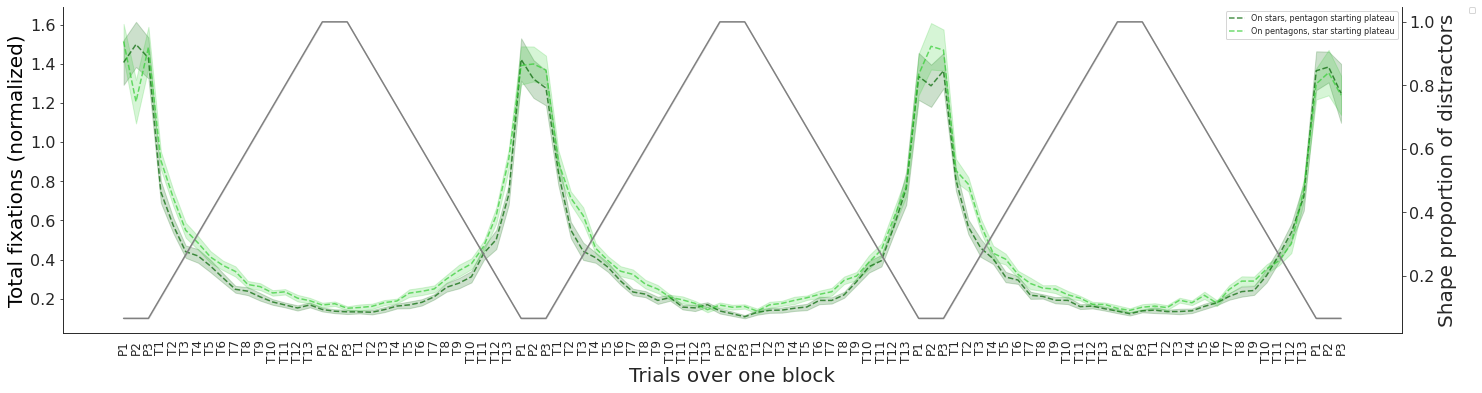

In [20]:
fig, ax = plt.subplots(1, figsize=(24,6))

sns.set_style("white")
ax.grid(False)

# Total fixations on each shape throughout the block

sns.lineplot(data=data_avg[data_avg['Starting Plateau']==0], x='CycleIndex',y = 'Fixation Count Start Optimal Normalized',
            color = 'darkgreen', ax=ax, linestyle='dashed', label='On stars, pentagon starting plateau',
             errorbar='se',alpha = 0.7, err_style='band')
sns.lineplot(data=data_avg[data_avg['Starting Plateau']==1], x='CycleIndex', y = 'Fixation Count Start Optimal Normalized',
            color = 'limegreen', ax=ax, linestyle='dashed', label='On pentagons, star starting plateau',
             errorbar='se',alpha = 0.7, err_style='band')
ax1 = ax.twinx()
sns.lineplot(data=data_avg, x="CycleIndex", y="spu_elements_percentage", color='grey', ax=ax1, dashes=False)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_xlabel("Trials over one block",fontsize=20)

ax.set_ylabel("Total fixations (normalized)",color = 'black',fontsize=20)

plt.xticks(range(0,99))
ax.set_xticklabels(6 * (['P1','P2','P3'] + ["T%d" %i for i in range(1,14)])+['P1','P2','P3'],rotation = 90)

ax1.set_ylabel("Shape proportion of distractors",fontsize=20)

ax.spines["top"].set_visible(False)
ax1.spines["top"].set_visible(False)

#plt.rc('font', size = SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize = SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize = MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize = 12)    # fontsize of the tick labels
plt.rc('ytick', labelsize =16)    # fontsize of the tick labels
#plt.rc('legend', fontsize = SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize = BIGGER_SIZE)  # fontsize of the figure title

plt.savefig('total_fixation.svg')
plt.show()

### Plot first/last/total fixations on the unique and non-unique shapes in the plateaus

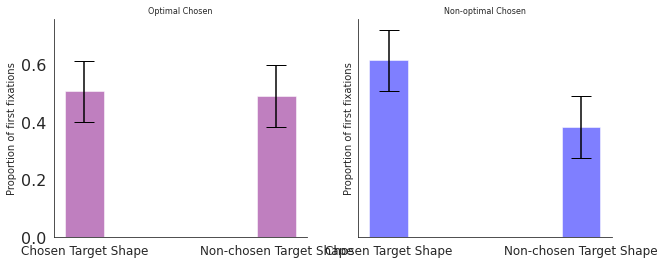

In [22]:
import pandas as pd
data = data[data['Stages'].str.contains('P')]
data['Start Optimal Selected'] = data['Pentagon Selected'] * data['Starting Plateau'] + data['Star Selected'] * (1 - data['Starting Plateau'])
data['Chosen Target'] = data['Start Optimal Selected'].apply(lambda x: ['Non-optimal Chosen','Optimal Chosen'][x])

data['First Fixation Set Star'] = (data['First Fixation Set']=='star').astype(int)
data['First Fixation Set Pentagon'] = (data['First Fixation Set']=='pentagon').astype(int)

data_new = data.groupby(['Participant No','Starting Plateau', 'Chosen Target']).mean().reset_index()

# y_1_optimal_optimal means optimal (uniuqe) shape was selected and fixation made also to the optimal (uniuqe) shape
y_1_optimal_optimal = data[(data['Starting Plateau'] == 1) & (data['Chosen Target'] == 'Optimal Chosen')].groupby(['Participant No'])['First Fixation Set Pentagon'].mean()
y_1_optimal_nonoptimal = data[(data['Starting Plateau'] == 1) & (data['Chosen Target'] == 'Optimal Chosen')].groupby(['Participant No'])['First Fixation Set Star'].mean()

y_0_optimal_optimal = data[(data['Starting Plateau'] == 0) & (data['Chosen Target'] == 'Optimal Chosen')].groupby(['Participant No'])['First Fixation Set Star'].mean()
y_0_optimal_nonoptimal = data[(data['Starting Plateau'] == 0) & (data['Chosen Target'] == 'Optimal Chosen')].groupby(['Participant No'])['First Fixation Set Pentagon'].mean()

y_1_nonoptimal_optimal = data[(data['Starting Plateau'] == 1) & (data['Chosen Target'] == 'Non-optimal Chosen')].groupby(['Participant No'])['First Fixation Set Pentagon'].mean()
y_1_nonoptimal_nonoptimal = data[(data['Starting Plateau'] == 1) & (data['Chosen Target'] == 'Non-optimal Chosen')].groupby(['Participant No'])['First Fixation Set Star'].mean()

y_0_nonoptimal_optimal = data[(data['Starting Plateau'] == 0) & (data['Chosen Target'] == 'Non-optimal Chosen')].groupby(['Participant No'])['First Fixation Set Star'].mean()
y_0_nonoptimal_nonoptimal = data[(data['Starting Plateau'] == 0) & (data['Chosen Target'] == 'Non-optimal Chosen')].groupby(['Participant No'])['First Fixation Set Pentagon'].mean()

# Calculate the average
y_optimal_optimal_mean = np.mean(pd.concat([y_1_optimal_optimal,y_0_optimal_optimal]))
y_optimal_nonoptimal_mean = np.mean(pd.concat([y_1_optimal_nonoptimal,y_0_optimal_nonoptimal])) 

y_nonoptimal_optimal_mean = np.mean(pd.concat([y_1_nonoptimal_optimal,y_0_nonoptimal_optimal]))
y_nonoptimal_nonoptimal_mean = np.mean(pd.concat([y_1_nonoptimal_nonoptimal,y_0_nonoptimal_nonoptimal])) 

# Calculate the standard deviation
y_optimal_optimal_std = np.std(pd.concat([y_1_optimal_optimal,y_0_optimal_optimal]))
y_optimal_nonoptimal_std = np.std(pd.concat([y_1_optimal_nonoptimal,y_0_optimal_nonoptimal])) 

y_nonoptimal_optimal_std = np.std(pd.concat([y_1_nonoptimal_optimal,y_0_nonoptimal_optimal]))
y_nonoptimal_nonoptimal_std = np.std(pd.concat([y_1_nonoptimal_nonoptimal,y_0_nonoptimal_nonoptimal])) 


# Create lists for the plot
x = ['Chosen Target Shape', 'Non-chosen Target Shape']
x_pos = np.arange(len(x))
y = [y_optimal_optimal_mean,y_optimal_nonoptimal_mean]
error = [y_optimal_optimal_std,y_optimal_nonoptimal_std ]

y5 = [y_nonoptimal_nonoptimal_mean,y_nonoptimal_optimal_mean]
error5 = [y_nonoptimal_nonoptimal_std,y_nonoptimal_optimal_std]


# Build the plot
fig, ax = plt.subplots(1,2, figsize = (10,4),sharey=True)
ax[0].bar(x_pos, y, yerr=error, color = "purple", width=0.2, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1].bar(x_pos, y5, yerr=error5, color = "blue", width=0.2, align='center', alpha=0.5, ecolor='black', capsize=10)


ax[0].set_ylabel('Proportion of first fixations')
ax[0].set_xticks(x_pos)
ax[0].set_xticklabels(x)
ax[0].set_title('Optimal Chosen')
ax[0].yaxis.grid(True)

ax[1].set_ylabel('Proportion of first fixations')
ax[1].set_xticks(x_pos)
ax[1].set_xticklabels(x)
ax[1].set_title('Non-optimal Chosen')
ax[1].yaxis.grid(True)

ax[0].spines["right"].set_visible(False) # top, bottom, left
ax[0].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False) # top, bottom, left
ax[1].spines["top"].set_visible(False)
ax[0].grid(False)
ax[1].grid(False)

#plt.savefig("FirstFixations.svg")


### The following code saves the respective data for BEST procedure comparison

In [23]:

df = pd.DataFrame()

yoc1 = y_1_optimal_optimal.to_numpy()
yoc0 = y_0_optimal_optimal.to_numpy()
yoc = np.concatenate((yoc1, yoc0), axis=0)

df['optimal_selected_optimal_first_fixation'] = yoc

yon1 = y_1_optimal_nonoptimal.to_numpy()
yon0 = y_0_optimal_nonoptimal.to_numpy()
yon = np.concatenate((yon1, yon0), axis=0)

df['optimal_selected_nonoptimal_first_fixation'] = yon

ynn1 = y_1_nonoptimal_nonoptimal.to_numpy()
ynn0 = y_0_nonoptimal_nonoptimal.to_numpy()
ynn = np.concatenate((ynn1, ynn0), axis=0)

df['nonoptimal_selected_nonoptimal_first_fixation'] = ynn

yno1 = y_1_nonoptimal_optimal.to_numpy()
yno0 = y_0_nonoptimal_optimal.to_numpy()
yno = np.concatenate((yno1, yno0), axis=0)

df['nonoptimal_selected_optimal_first_fixation'] = yno

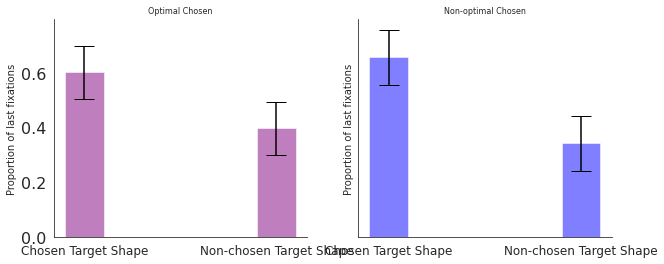

In [24]:
data['Last Fixation Set Star'] = (data['Last Fixation Set']=='star').astype(int)
data['Last Fixation Set Pentagon'] = (data['Last Fixation Set']=='pentagon').astype(int)

data_new = data.groupby(['Participant No','Starting Plateau', 'Chosen Target']).mean().reset_index()

y_1_optimal_optimal = data[(data['Starting Plateau'] == 1) & (data['Chosen Target'] == 'Optimal Chosen')].groupby(['Participant No'])['Last Fixation Set Pentagon'].mean()
y_1_optimal_nonoptimal = data[(data['Starting Plateau'] == 1) & (data['Chosen Target'] == 'Optimal Chosen')].groupby(['Participant No'])['Last Fixation Set Star'].mean()


y_0_optimal_optimal = data[(data['Starting Plateau'] == 0) & (data['Chosen Target'] == 'Optimal Chosen')].groupby(['Participant No'])['Last Fixation Set Star'].mean()
y_0_optimal_nonoptimal = data[(data['Starting Plateau'] == 0) & (data['Chosen Target'] == 'Optimal Chosen')].groupby(['Participant No'])['Last Fixation Set Pentagon'].mean()

y_1_nonoptimal_optimal = data[(data['Starting Plateau'] == 1) & (data['Chosen Target'] == 'Non-optimal Chosen')].groupby(['Participant No'])['Last Fixation Set Pentagon'].mean()
y_1_nonoptimal_nonoptimal = data[(data['Starting Plateau'] == 1) & (data['Chosen Target'] == 'Non-optimal Chosen')].groupby(['Participant No'])['Last Fixation Set Star'].mean()


y_0_nonoptimal_optimal = data[(data['Starting Plateau'] == 0) & (data['Chosen Target'] == 'Non-optimal Chosen')].groupby(['Participant No'])['Last Fixation Set Star'].mean()
y_0_nonoptimal_nonoptimal = data[(data['Starting Plateau'] == 0) & (data['Chosen Target'] == 'Non-optimal Chosen')].groupby(['Participant No'])['Last Fixation Set Pentagon'].mean()

# Calculate the average
y_optimal_optimal_mean = np.mean(pd.concat([y_1_optimal_optimal,y_0_optimal_optimal]))
y_optimal_nonoptimal_mean = np.mean(pd.concat([y_1_optimal_nonoptimal,y_0_optimal_nonoptimal])) 

y_nonoptimal_optimal_mean = np.mean(pd.concat([y_1_nonoptimal_optimal,y_0_nonoptimal_optimal]))
y_nonoptimal_nonoptimal_mean = np.mean(pd.concat([y_1_nonoptimal_nonoptimal,y_0_nonoptimal_nonoptimal])) 

# Calculate the standard deviation
y_optimal_optimal_std = np.std(pd.concat([y_1_optimal_optimal,y_0_optimal_optimal]))
y_optimal_nonoptimal_std = np.std(pd.concat([y_1_optimal_nonoptimal,y_0_optimal_nonoptimal])) 

y_nonoptimal_optimal_std = np.std(pd.concat([y_1_nonoptimal_optimal,y_0_nonoptimal_optimal]))
y_nonoptimal_nonoptimal_std = np.std(pd.concat([y_1_nonoptimal_nonoptimal,y_0_nonoptimal_nonoptimal])) 


# Create lists for the plot
x = ['Chosen Target Shape', 'Non-chosen Target Shape']
x_pos = np.arange(len(x))
y = [y_optimal_optimal_mean,y_optimal_nonoptimal_mean]
error = [y_optimal_optimal_std,y_optimal_nonoptimal_std ]

y5 = [y_nonoptimal_nonoptimal_mean,y_nonoptimal_optimal_mean]
error5 = [y_nonoptimal_nonoptimal_std,y_nonoptimal_optimal_std]

# Build the plot
fig, ax = plt.subplots(1,2, figsize = (10,4),sharey=True)

ax[0].bar(x_pos, y, yerr=error, color = "purple", width=0.2, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1].bar(x_pos, y5, yerr=error5,  color = "blue", width=0.2, align='center', alpha=0.5, ecolor='black', capsize=10)

ax[0].set_ylabel('Proportion of last fixations')
ax[0].set_xticks(x_pos)
ax[0].set_xticklabels(x)
ax[0].set_title('Optimal Chosen')
ax[0].yaxis.grid(True)

ax[1].set_ylabel('Proportion of last fixations')
ax[1].set_xticks(x_pos)
ax[1].set_xticklabels(x)
ax[1].set_title('Non-optimal Chosen')
ax[1].yaxis.grid(True)

ax[0].spines["right"].set_visible(False) # top, bottom, left
ax[0].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False) # top, bottom, left
ax[1].spines["top"].set_visible(False)
ax[0].grid(False)
ax[1].grid(False)

#plt.savefig("LastFixations.svg")

In [25]:
yoc1 = y_1_optimal_optimal.to_numpy()
yoc0 = y_0_optimal_optimal.to_numpy()
yoc = np.concatenate((yoc1, yoc0), axis=0)

df['optimal_selected_optimal_last_fixation'] = yoc

yon1 = y_1_optimal_nonoptimal.to_numpy()
yon0 = y_0_optimal_nonoptimal.to_numpy()
yon = np.concatenate((yon1, yon0), axis=0)

df['optimal_selected_nonoptimal_last_fixation'] = yon

ynn1 = y_1_nonoptimal_nonoptimal.to_numpy()
ynn0 = y_0_nonoptimal_nonoptimal.to_numpy()
ynn = np.concatenate((ynn1, ynn0), axis=0)

df['nonoptimal_selected_nonoptimal_last_fixation'] = ynn

yno1 = y_1_nonoptimal_optimal.to_numpy()
yno0 = y_0_nonoptimal_optimal.to_numpy()
yno = np.concatenate((yno1, yno0), axis=0)

df['nonoptimal_selected_optimal_last_fixation'] = yno


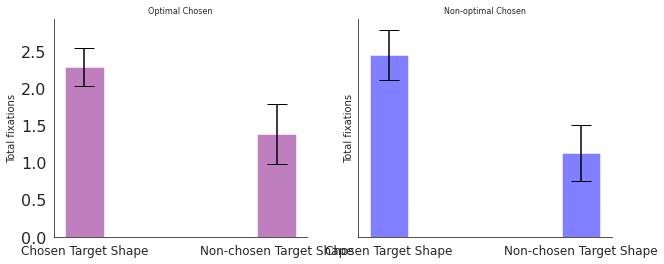

In [26]:
import pandas as pd
data = data[data['Stages'].str.contains('P')]
data['Start Optimal Selected'] = data['Pentagon Selected'] * data['Starting Plateau'] + data['Star Selected'] * (1 - data['Starting Plateau'])
data['Chosen Target'] = data['Start Optimal Selected'].apply(lambda x: ['Non-optimal Chosen','Optimal Chosen'][x])

data_new = data.groupby(['Participant No','Starting Plateau', 'Chosen Target']).mean().reset_index()

y_1_optimal_optimal = data[(data['Starting Plateau'] == 1) & (data['Chosen Target'] == 'Optimal Chosen')].groupby(['Participant No'])['Pentagon Fixation Count'].mean()
y_1_optimal_nonoptimal = data[(data['Starting Plateau'] == 1) & (data['Chosen Target'] == 'Optimal Chosen')].groupby(['Participant No'])['Star Fixation Count'].mean()


y_0_optimal_optimal = data[(data['Starting Plateau'] == 0) & (data['Chosen Target'] == 'Optimal Chosen')].groupby(['Participant No'])['Star Fixation Count'].mean()
y_0_optimal_nonoptimal = data[(data['Starting Plateau'] == 0) & (data['Chosen Target'] == 'Optimal Chosen')].groupby(['Participant No'])['Pentagon Fixation Count'].mean()

y_1_nonoptimal_optimal = data[(data['Starting Plateau'] == 1) & (data['Chosen Target'] == 'Non-optimal Chosen')].groupby(['Participant No'])['Pentagon Fixation Count'].mean()
y_1_nonoptimal_nonoptimal = data[(data['Starting Plateau'] == 1) & (data['Chosen Target'] == 'Non-optimal Chosen')].groupby(['Participant No'])['Star Fixation Count'].mean()

y_0_nonoptimal_optimal = data[(data['Starting Plateau'] == 0) & (data['Chosen Target'] == 'Non-optimal Chosen')].groupby(['Participant No'])['Star Fixation Count'].mean()
y_0_nonoptimal_nonoptimal = data[(data['Starting Plateau'] == 0) & (data['Chosen Target'] == 'Non-optimal Chosen')].groupby(['Participant No'])['Pentagon Fixation Count'].mean()

# Calculate the average
y_optimal_optimal_mean = np.mean(pd.concat([y_1_optimal_optimal,y_0_optimal_optimal]))
y_optimal_nonoptimal_mean = np.mean(pd.concat([y_1_optimal_nonoptimal,y_0_optimal_nonoptimal])) 

y_nonoptimal_optimal_mean = np.mean(pd.concat([y_1_nonoptimal_optimal,y_0_nonoptimal_optimal]))
y_nonoptimal_nonoptimal_mean = np.mean(pd.concat([y_1_nonoptimal_nonoptimal,y_0_nonoptimal_nonoptimal])) 

# Calculate the standard deviation
y_optimal_optimal_std = np.std(pd.concat([y_1_optimal_optimal,y_0_optimal_optimal]))
y_optimal_nonoptimal_std = np.std(pd.concat([y_1_optimal_nonoptimal,y_0_optimal_nonoptimal])) 

y_nonoptimal_optimal_std = np.std(pd.concat([y_1_nonoptimal_optimal,y_0_nonoptimal_optimal]))
y_nonoptimal_nonoptimal_std = np.std(pd.concat([y_1_nonoptimal_nonoptimal,y_0_nonoptimal_nonoptimal])) 

# Create lists for the plot
x = ['Chosen Target Shape', 'Non-chosen Target Shape']
x_pos = np.arange(len(x))
y = [y_optimal_optimal_mean,y_optimal_nonoptimal_mean]
error = [y_optimal_optimal_std,y_optimal_nonoptimal_std ]

y5 = [y_nonoptimal_nonoptimal_mean,y_nonoptimal_optimal_mean]
error5 = [y_nonoptimal_nonoptimal_std,y_nonoptimal_optimal_std]

# Build the plot
fig, ax = plt.subplots(1,2, figsize = (10,4),sharey=True)

ax[0].bar(x_pos, y, yerr=error,color = "purple", align='center',width=0.2, alpha=0.5, ecolor='black', capsize=10)
ax[1].bar(x_pos, y5, yerr=error5, color = "blue",align='center', width=0.2, alpha=0.5, ecolor='black', capsize=10)

ax[0].set_ylabel('Total fixations')
ax[0].set_xticks(x_pos)
ax[0].set_xticklabels(x)
ax[0].set_title('Optimal Chosen')
ax[0].yaxis.grid(True)

ax[1].set_ylabel('Total fixations')
ax[1].set_xticks(x_pos)
ax[1].set_xticklabels(x)
ax[1].set_title('Non-optimal Chosen')
ax[1].yaxis.grid(True)

ax[0].spines["right"].set_visible(False) # top, bottom, left
ax[0].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False) # top, bottom, left
ax[1].spines["top"].set_visible(False)
ax[0].grid(False)
ax[1].grid(False)

#plt.savefig("TotalFixations.svg")

In [28]:
yoc1 = y_1_optimal_optimal.to_numpy()
yoc0 = y_0_optimal_optimal.to_numpy()
yoc = np.concatenate((yoc1, yoc0), axis=0)
df['optimal_selected_optimal_total_fixation'] = yoc

yon1 = y_1_optimal_nonoptimal.to_numpy()
yon0 = y_0_optimal_nonoptimal.to_numpy()
yon = np.concatenate((yon1, yon0), axis=0)
df['optimal_selected_nonoptimal_total_fixation'] = yon

ynn1 = y_1_nonoptimal_nonoptimal.to_numpy()
ynn0 = y_0_nonoptimal_nonoptimal.to_numpy()
ynn = np.concatenate((ynn1, ynn0), axis=0)
df['nonoptimal_selected_nonoptimal_total_fixation'] = ynn

yno1 = y_1_nonoptimal_optimal.to_numpy()
yno0 = y_0_nonoptimal_optimal.to_numpy()
yno = np.concatenate((yno1, yno0), axis=0)
df['nonoptimal_selected_optimal_total_fixation'] = yno


In [29]:
df.to_csv('MuEtAl-2022-Exp1-Lab-EyetrackingDataPlateaus.csv')